In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv(r"C:\Users\91708\Downloads\9.csv")

In [3]:
dataset.head()

,TV,Radio,Social Media,Influencer,Sales
0,16,6.566231,2.907983,Mega,54.732757
1,13,9.237765,2.409567,Mega,46.677897
2,41,15.886446,2.913410,Mega,150.177829
3,83,30.020028,6.922304,Mega,298.246340
4,15,8.437408,1.405998,Micro,56.594181


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4572 non-null   int64  
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 178.7+ KB


In [9]:
dataset = dataset.fillna(dataset.select_dtypes(include='number').mean())

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4572 non-null   int64  
 1   Radio         4572 non-null   float64
 2   Social Media  4572 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4572 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 178.7+ KB


In [13]:
dataset = pd.get_dummies(dataset)

In [15]:
dataset

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16,6.566231,2.907983,54.732757,False,True,False,False
1,13,9.237765,2.409567,46.677897,False,True,False,False
2,41,15.886446,2.913410,150.177829,False,True,False,False
3,83,30.020028,6.922304,298.246340,False,True,False,False
4,15,8.437408,1.405998,56.594181,False,False,True,False
...,...,...,...,...,...,...,...,...
4567,26,4.472360,0.717090,94.685866,False,False,True,False
4568,71,20.610685,6.545573,249.101915,False,False,False,True
4569,44,19.800072,5.096192,163.631457,False,False,True,False
4570,71,17.534640,1.940873,253.610411,True,False,False,False


In [17]:
dataset = dataset[['TV', 'Radio', 'Social Media', 'Influencer_Macro',
       'Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano', 'Sales']]

In [19]:
x = dataset.iloc[:,0:-1].values
y = dataset.iloc[:,-1:].values

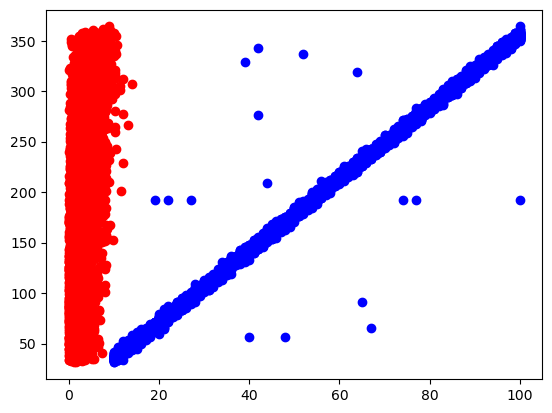

In [21]:
plt.scatter(dataset["TV"],y,color = 'blue')
plt.scatter(dataset["Social Media"],y,color = 'red')

In [23]:
print(x)
print(y)

[[16 6.566230788 2.907982773 ... True False False]
 [13 9.237764567 2.409567204 ... True False False]
 [41 15.88644602 2.913410175 ... True False False]
 ...
 [44 19.80007236 5.096191875 ... False True False]
 [71 17.5346403 1.94087322 ... False False False]
 [42 15.96668752 5.046547629 ... False True False]]
[[ 54.73275715]
 [ 46.67789698]
 [150.1778288 ]
 ...
 [163.6314574 ]
 [253.6104113 ]
 [148.2024141 ]]


In [25]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [31]:
y_pred1 = lr.predict(x_test)

In [33]:
from sklearn.metrics import r2_score

In [35]:
print(r2_score(y_test, y_pred1))

0.9948298271626653


In [37]:
from sklearn.ensemble import RandomForestRegressor
     

In [39]:
rf = RandomForestRegressor()

In [41]:
rf.fit(x_train,y_train)

C:\Users\91708\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [43]:
y_pred2 = rf.predict(x_test)

In [45]:
print(r2_score(y_test, y_pred2))

0.9931000214983488


In [47]:
from sklearn.tree import DecisionTreeRegressor

In [49]:
dr = DecisionTreeRegressor()

In [51]:
dr.fit(x_train,y_train)

DecisionTreeRegressor()

In [53]:
y_pred3 = dr.predict(x_test)

In [55]:
print(r2_score(y_test,y_pred3))

0.988770279454198
